# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,mean_squared_log_error
from xgboost import XGBRegressor
from lazypredict.Supervised import LazyRegressor

# Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_df=pd.read_csv("/content/drive/My Drive/Machine_hack/train.csv")
test_df=pd.read_csv("/content/drive/My Drive/Machine_hack/test.csv")

# Data Exploration

#### 1. Now as we successfully load the dataset now we will perform initial exploration and try to understand our data beteer
#### 2. We will also combine the test and train dataset for Data Wrangling and Feature Engineering Task

In [4]:
# Lets set the Display max rows nd column option so we can see all columns and rows we want to see
pd.set_option("display.max_rows",train_df.shape[0])
pd.set_option("display.max_columns",train_df.shape[1])

In [5]:
# Check the shape of the data
train_df.shape, test_df.shape

((19237, 18), (8245, 18))

#####  No. of columns in both train and test dataset is equal which should not be the case ideally let's explore this further

In [6]:
# Print the Columns of Train datset
train_df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [7]:
# PRint the columns of test datset
test_df.columns

Index(['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

In [8]:
train_df.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.00,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.00,Tiptronic,4x4,04-May,Left wheel,Black,8


In [9]:
test_df.head(2)

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,nan
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,nan


#### As we can see the Price column has NaN for both records  in Test Dataset let's check the info of data

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Levy              8245 non-null   object 
 2   Manufacturer      8245 non-null   object 
 3   Model             8245 non-null   object 
 4   Prod. year        8245 non-null   int64  
 5   Category          8245 non-null   object 
 6   Leather interior  8245 non-null   object 
 7   Fuel type         8245 non-null   object 
 8   Engine volume     8245 non-null   object 
 9   Mileage           8245 non-null   object 
 10  Cylinders         8245 non-null   int64  
 11  Gear box type     8245 non-null   object 
 12  Drive wheels      8245 non-null   object 
 13  Doors             8245 non-null   object 
 14  Wheel             8245 non-null   object 
 15  Color             8245 non-null   object 
 16  Airbags           8245 non-null   int64  


#### Let's check the Categorical and Numerical variables Sepeately

In [12]:
cat_var=train_df.select_dtypes(include=[np.object])
print("No. of Categorical Variable: {}".format(cat_var.shape[1]))
print("*************************************************************************")
print(f"The Categorical Variables are: {list(cat_var.columns)}")

No. of Categorical Variable: 13
*************************************************************************
The Categorical Variables are: ['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']


In [13]:
numerical_var=train_df.select_dtypes(include=[np.float64,np.int64])
print("No. of Categorical Variable: {}".format(numerical_var.shape[1]))
print("*************************************************************************")
print(f"The Categorical Variables are: {list(numerical_var.columns)}")

No. of Categorical Variable: 5
*************************************************************************
The Categorical Variables are: ['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']


In [14]:
# print unique values of a column having less than 10 unique values
for i in cat_var.columns:
    if train_df[i].nunique()<10:
        print(f"Columns Name: {i}")
        print(train_df[i].unique())
        print("------------------------------------------------------------")

Columns Name: Leather interior
['Yes' 'No']
------------------------------------------------------------
Columns Name: Fuel type
['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']
------------------------------------------------------------
Columns Name: Gear box type
['Automatic' 'Tiptronic' 'Variator' 'Manual']
------------------------------------------------------------
Columns Name: Drive wheels
['4x4' 'Front' 'Rear']
------------------------------------------------------------
Columns Name: Doors
['04-May' '02-Mar' '>5']
------------------------------------------------------------
Columns Name: Wheel
['Left wheel' 'Right-hand drive']
------------------------------------------------------------


In [15]:
#Unique Values
train_df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [16]:
# Print the total no of missing values and % of missing values for each column
pd.DataFrame({"Missing Values":train_df.isna().sum(),"Missing Value (%)":100*train_df.isna().sum()/train_df.shape[0]}).reset_index(0).rename(columns={"index":"Column_name"})

,Column_name,Missing Values,Missing Value (%)
0,ID,0,0.00
1,Price,0,0.00
2,Levy,0,0.00
3,Manufacturer,0,0.00
4,Model,0,0.00
5,Prod. year,0,0.00
6,Category,0,0.00
7,Leather interior,0,0.00
8,Fuel type,0,0.00
9,Engine volume,0,0.00


#### As per our Domain knowledge we know that Mileage,Engine Volume and Levy should be a numerical variable so there may be some issues with the value in this column 

In [17]:
train_df.Mileage.value_counts()[:5]

0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
Name: Mileage, dtype: int64

In [18]:
train_df['Engine volume'].value_counts()[:10]

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
3.5          1228
2.4           987
3             823
1.3           518
2.0 Turbo     408
Name: Engine volume, dtype: int64

In [19]:
train_df["Levy"].value_counts()[:5]

-      5819
765     486
891     461
639     410
640     405
Name: Levy, dtype: int64

In [20]:
def pre_processing(df,col1,col2,col3,col4):
    df[col1]=df[col1].apply(lambda x:float(x.split(" ")[0]))
    df["Turbo_Egine"]=df[col2].apply(lambda x: "yes" if x.split(" ")[0]=="Turbo" else "No")
    df[col2]=df[col2].apply(lambda x:float(x.split(" ")[0]))
    df["Levy_imposed"]=df[col3].apply(lambda x: "yes" if x !="-" else "No")
    df.loc[df[col3]=="-",col3]=0
    df[col3]=df[col3].astype("float64")
    df[col4]=df[col4].apply(lambda x:x.split("-")[0])

In [21]:
pre_processing(train_df,'Mileage','Engine volume','Levy',"Doors")

In [22]:
pre_processing(test_df,'Mileage','Engine volume','Levy',"Doors")

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  float64
 10  Mileage           19237 non-null  float64
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

#  Exploratory Data Aalysis

In [24]:
#sns.pairplot(train_df)

In [25]:
train_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,19237.00000,19237.00000,19237.00000,19237.00000,19237.00000,19237.00000,19237.00000,19237.00000
mean,45576535.88610,18555.92722,632.52867,2010.91282,2.30799,1532235.68769,4.58299,6.58263
std,936591.42280,190581.26968,567.72169,5.66867,0.87780,48403869.37929,1.19993,4.32017
min,20746880.00000,1.00000,0.00000,1939.00000,0.00000,0.00000,1.00000,0.00000
25%,45698374.00000,5331.00000,0.00000,2009.00000,1.80000,70139.00000,4.00000,4.00000
50%,45772308.00000,13172.00000,642.00000,2012.00000,2.00000,126000.00000,4.00000,6.00000
75%,45802036.00000,22075.00000,917.00000,2015.00000,2.50000,188888.00000,4.00000,12.00000
max,45816654.00000,26307500.00000,11714.00000,2020.00000,20.00000,2147483647.00000,16.00000,16.00000


Text(0.5, 1.0, 'Correlation Matrix')

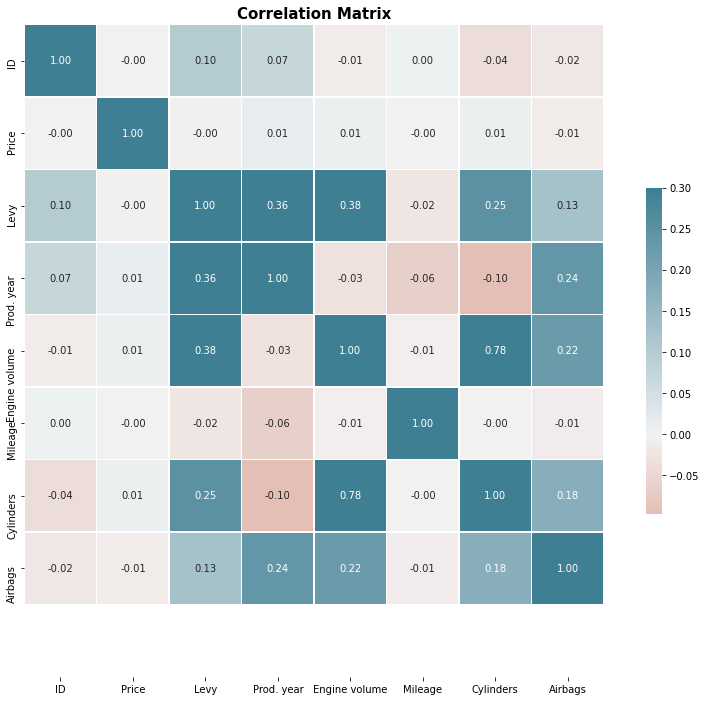

In [26]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=train_df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(9, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

In [27]:
plt.rcParams['figure.figsize']=[12,8]
sns.set(style='darkgrid')

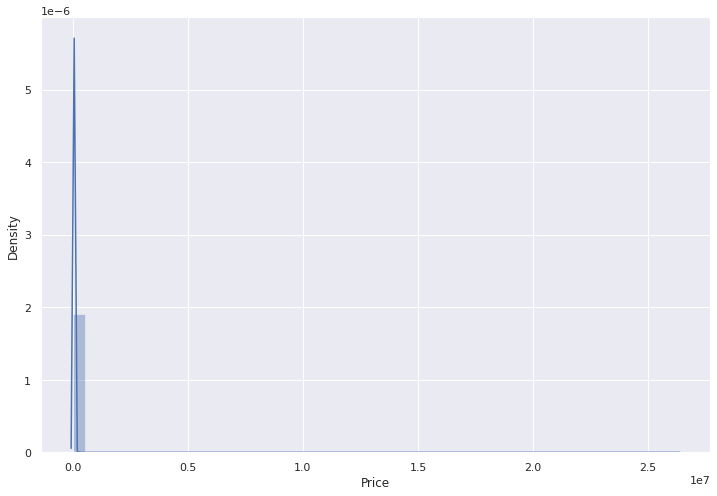

In [28]:
sns.distplot(train_df.Price)

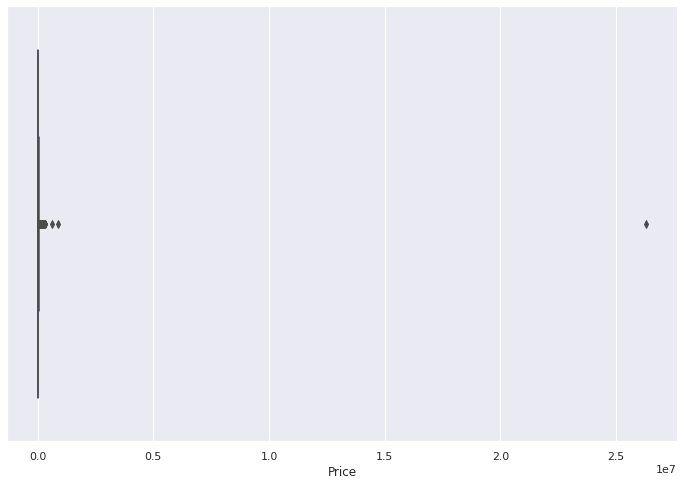

In [29]:
sns.boxplot(train_df.Price)

In [30]:
#remove outliers using IQR
Q1 = np.percentile(train_df['Price'],25)
Q2 = np.percentile(train_df['Price'],50)
Q3 = np.percentile(train_df['Price'],75)
IQR =  Q3 - Q1
a=Q1-(1.5*IQR)
b=Q3+(1.5*IQR)
df1=train_df[(train_df['Price']<b) & (train_df['Price']>a)]

In [31]:
df1.shape

(18164, 20)

In [32]:
df1.Price.describe()

count   18164.00
mean    14024.92
std     11377.78
min         1.00
25%      4861.00
50%     12231.00
75%     20071.00
max     47120.00
Name: Price, dtype: float64

In [33]:
# As we can see IQR method gives us the minimum price of 1 unit and distribution is more positively skewed and right tail goes upto a vergh value we will use other way to filter the data
min= train_df.Price.quantile(0.025)
max = train_df.Price.quantile(0.975)
filtered_df= train_df[(train_df.Price>min)&(train_df.Price<max)]
filtered_df.shape

(18208, 20)

In [34]:
filtered_df.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,18208.00,18208.00,18208.00,18208.00,18208.00,18208.00,18208.00,18208.00
mean,45616791.78,15716.08,634.63,2010.84,2.29,1432276.39,4.55,6.57
std,721105.62,13061.94,561.43,5.58,0.86,46418303.92,1.16,4.30
min,23242980.00,160.00,0.00,1939.00,0.00,0.00,1.00,0.00
25%,45720071.00,5959.00,0.00,2009.00,1.80,72000.00,4.00,4.00
50%,45773275.50,13172.00,642.00,2012.00,2.00,127634.50,4.00,6.00
75%,45802158.25,21639.00,900.00,2014.00,2.50,189571.00,4.00,12.00
max,45816654.00,61471.00,11714.00,2020.00,20.00,2147483647.00,16.00,16.00


In [35]:
filtered_df["No_of_Year"]=2021-filtered_df["Prod. year"]
test_df["No_of_Year"]=2021-test_df["Prod. year"]

In [36]:
def data_Preprocessing(df,list):
    # Drop Column not required in analysis
    df.drop(list,axis=1,inplace=True)
    
    # 
    df.loc[df["Fuel type"]=="Hydrogen","Fuel type"]="Plug-in Hybrid"
    # Store Numerical and Categoricall column Seperately
    cat_var=df.select_dtypes(include=[np.object])
    num_var=df.select_dtypes(include=[np.float64,np.int64])
    
    #  Convert categorical column to Dummy Variables
    dumm_var=pd.get_dummies(cat_var, drop_first=True)
    n=pd.concat([num_var, dumm_var], axis=1)
    
    # Impute Missing Values
    X=n.values
    imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    return pd.DataFrame(Xtrans,columns=n.columns.to_list())

In [37]:
train_df=data_Preprocessing(filtered_df,['ID','Model', 'Prod. year','Manufacturer',"Color"])
test_df=data_Preprocessing(test_df,['ID',  'Model', 'Prod. year',"Price",'Manufacturer',"Color"])

In [38]:
train_df.shape

(18208, 32)

In [39]:
test_df.shape

(8245, 31)

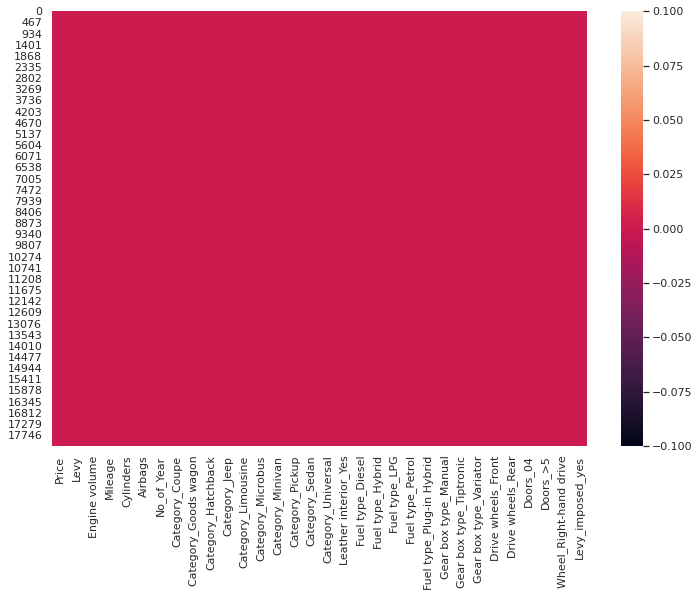

In [40]:
sns.heatmap(train_df.isnull())

In [41]:
X=train_df.drop(["Price"],axis=1)
y=train_df["Price"]

## Let's check 5 Most Important Featuers

In [42]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

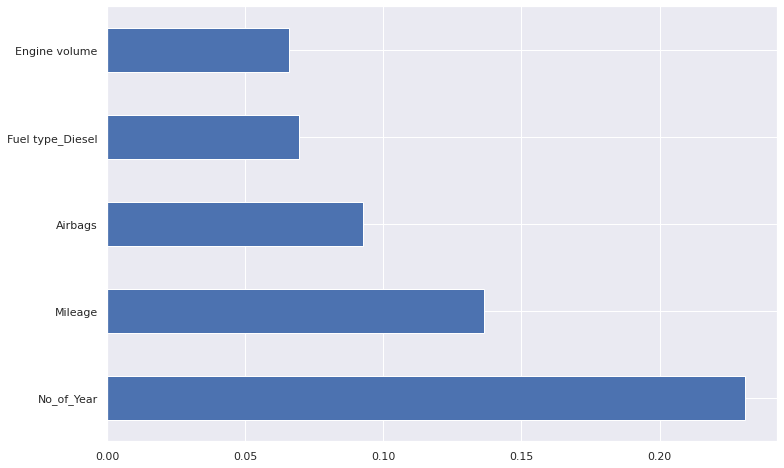

In [43]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### To create our Baseline Models we will use Lazy predict library which gives aroung 42 base line models and there evaluation matrix in minimal line of codes 

In [45]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 42/42 [04:16<00:00,  6.10s/it]

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
RandomForestRegressor                        0.77       0.77   6266.54   
XGBRegressor                                 0.76       0.76   6402.08   
ExtraTreesRegressor                          0.75       0.75   6476.50   
BaggingRegressor                             0.75       0.75   6505.18   
LGBMRegressor                                0.74       0.74   6651.10   
HistGradientBoostingRegressor                0.73       0.73   6753.06   
KNeighborsRegressor                          0.69       0.69   7208.01   
GradientBoostingRegressor                    0.61       0.61   8125.62   
DecisionTreeRegressor                        0.60       0.60   8191.46   
ExtraTreeRegressor                           0.60       0.60   8217.95   
MLPRegressor                                 0.40       0.40  10054.56   
PoissonRegressor                      

# Hyper Parameter Tuning best Base line model using Randomsearch CV


1.   To find the Best Hyperparameter Value uncomment the cells and run it
2.   Remember it is very costely in terms of Computatied it once and save Hyper Parameter to future use



In [46]:
#Let's create the base model and use random search cv to tune the Hyper Parameters
#regressor=RandomForestRegressor()

In [47]:

#Randomized Search CV

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 5, 10]

In [48]:
# Create the random grid
#random_grid = {'n_estimators': n_estimators,
              #  'max_features': max_features,
              #  'max_depth': max_depth,
              #  'min_samples_split': min_samples_split,
              #  'min_samples_leaf': min_samples_leaf}

#print(random_grid)

In [49]:
# Random search of parameters, using 5 fold cross validation, 
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [50]:
#rf_random.best_params_

In [51]:
# Moel Parameters 
#print(rf_random.best_estimator_)

In [52]:
#rf_random.fit(X_train,y_train)

## Prediction using Final_model

In [53]:
#best_params={'max_depth': 25,'max_features': 'sqrt','min_samples_leaf': 1,'min_samples_split': 2,'n_estimators': 1000}

In [54]:
rf = RandomForestRegressor(max_depth=25,max_features='sqrt',n_estimators=1000)

In [55]:
# Prediction using best parameters

rf.fit(X_train,y_train)
rf_random_predictions = rf.predict(X_test) 
  
print("r2 score : ",r2_score(y_test,rf_random_predictions))
print("MSLE     : ",mean_squared_log_error(y_test,rf_random_predictions))

r2 score :  0.7772552228562823
MSLE     :  0.568078017932461


In [56]:
pred=rf.predict(test_df)

In [57]:
prediction=pd.DataFrame(pred,columns=["Price"])

In [58]:
prediction.head()

,Price
0,17305.87
1,21425.22
2,8774.29
3,8555.78
4,3278.47


In [59]:
prediction.to_csv("/content/drive/My Drive/Machine_hack/Price.csv")